# **Final Notebook**
### Contributors: Heath Arroyo, Vansh Desai, and Emily Wick



## **Introduction**

We based our metrics on the concept of a dragon moving into the city of Pittsburgh. So for our case, **best** can be defined as: 
- **A neighborhood with a population that is not super high or dense**

If a dragon were to come to Pittsburgh it would most likely want to visit a neighborhood with people for it to feast on.

- **A neighborhood with a low wealth distribution**

Dragon's are known to collect large amounts of gold, so for our purposes we want to narrow it down to neighborhoods with lower wealth distribution as a dragon would less likely visit those neighborhoods.

- **A neighborhood with a large water area**

Worst case scenario a dragon starts spitting fire causing mass destruction. The best place to be in this scenario would be a neighborhood with large are of water for two reasons. The first reason being that water puts out fire, and secondly dragons cannot swim.

### Population


In [10]:
##importing panda libraries
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
##importing the Population Dataset(2015)
data = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv", index_col="Id", parse_dates=True)

data.head(10)

,Neighborhood,Estimate; Total,Margin of Error; Total
Id,,,
1,Allegheny Center,1411.0,196.000000
2,Allegheny West,343.0,96.000000
3,Allentown,2558.0,449.773276
4,Arlington,1852.0,348.188168
5,Arlington Heights,272.0,126.000000
6,Banksville,3858.0,581.107563
7,Bedford Dwellings,1349.0,180.000000
8,Beechview,8078.0,719.658252
9,Beltzhoover,1702.0,343.072879


- Since the population should not be too high we decided to choose the mean as the upper bound, which comes out to approximately 3400.

In [12]:
data['Estimate; Total'].mean()

3399.197802197802

In [13]:
##setting query mask for lower and upper bound
query_mask = data['Estimate; Total'] >=0

query_mask2 = data['Estimate; Total'] <=3400


In [14]:
##applying query mask to data
pop = data[query_mask & query_mask2]
pop.dropna
pop

,Neighborhood,Estimate; Total,Margin of Error; Total
Id,,,
1,Allegheny Center,1411.0,196.000000
2,Allegheny West,343.0,96.000000
3,Allentown,2558.0,449.773276
4,Arlington,1852.0,348.188168
5,Arlington Heights,272.0,126.000000
7,Bedford Dwellings,1349.0,180.000000
9,Beltzhoover,1702.0,343.072879
12,Bon Air,920.0,171.000000
15,California-Kirkbride,803.0,136.000000


- Now that we have our filtered population dataset, lets represent it on a map.

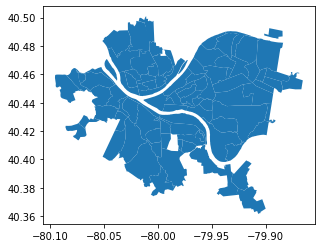

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

- This is a map of the neighborhoods of Pittsburgh, however it is very uninformative in its current state. So now, let's merge our filtered population dataset with our map data.

In [16]:
mergedHoods = neighborhoods.merge(pop, how='left', left_on='hood', right_on='Neighborhood')
mergedHoods[['Neighborhood','Estimate; Total','geometry']].dropna()

,Neighborhood,Estimate; Total,geometry
2,West Oakland,1717.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,2225.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,747.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
6,Spring Hill-City View,2456.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,3398.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,1191.0,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,1545.0,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."
11,Beltzhoover,1702.0,"POLYGON ((-79.99887 40.42174, -79.99853 40.421..."
14,Allentown,2558.0,"POLYGON ((-79.99967 40.42813, -79.99961 40.428..."
17,Fineview,1270.0,"POLYGON ((-80.00198 40.46814, -80.00129 40.467..."


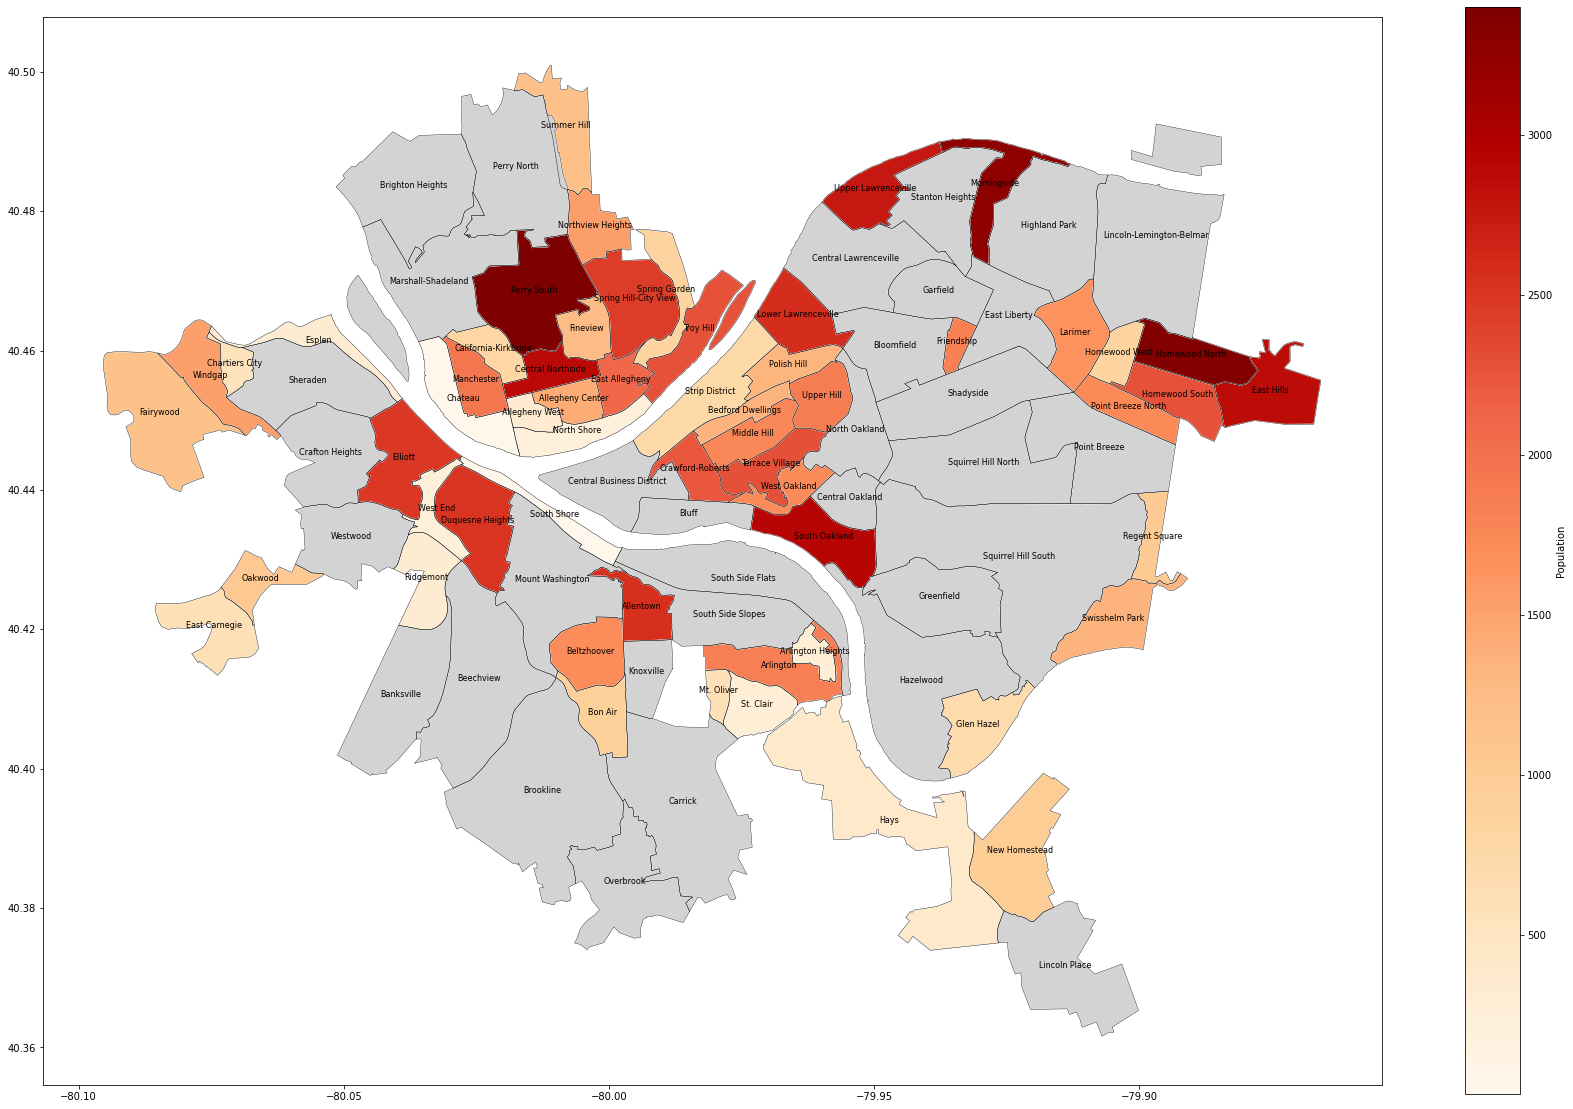

In [18]:
fig = plt.figure(1, figsize=(30,20)) 
ax = fig.add_subplot()
mergedHoods.apply(lambda x: ax.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,),axis=1);
mergedHoods.boundary.plot(ax=ax, color='Black', linewidth=.4)
mergedHoods.plot(ax=ax,column='Estimate; Total', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Population"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

- So now have a much more informative map to look at. All the neighborhoods in red are neighborhoods with a population less than 3400.

### Household Income

In [19]:
#load data
household_income = pd.read_csv("https://data.wprdc.org/datastore/dump/b119be7e-1c70-4bbe-bf34-2056fef533ec?inner_span=True")

In [20]:
household_income.head(10)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $75,000 to $99,999","Margin of Error; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Margin of Error; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Margin of Error; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Margin of Error; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more","Margin of Error; Total: - $200,000 or more"
0,Allegheny Center,1,870.0,93.000000,147.0,57.000000,115.0,54.000000,30.0,21.000000,...,73.0,39.000000,26.0,18.000000,25.0,25.000000,12.0,17.000000,21.0,21.000000
1,Allegheny West,2,146.0,36.000000,0.0,10.000000,3.0,7.000000,4.0,6.000000,...,11.0,10.000000,20.0,17.000000,0.0,10.000000,9.0,13.000000,21.0,24.000000
2,Allentown,3,1069.0,132.457540,190.0,82.134037,78.0,42.825226,78.0,80.305666,...,36.0,32.015621,31.0,42.941821,14.0,27.856777,0.0,17.320508,3.0,16.248077
3,Arlington,4,701.0,104.465305,70.0,42.497059,35.0,26.870058,56.0,29.086079,...,141.0,54.212545,23.0,17.804494,6.0,16.248077,7.0,17.320508,2.0,15.000000
4,Arlington Heights,5,144.0,59.000000,48.0,42.000000,23.0,27.000000,43.0,52.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
5,Banksville,6,1946.0,229.222599,51.0,43.588989,72.0,75.822160,155.0,83.048179,...,251.0,108.189648,126.0,71.337227,156.0,91.285267,64.0,45.442271,49.0,53.310412
6,Bedford Dwellings,7,723.0,53.000000,307.0,75.000000,129.0,50.000000,91.0,48.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
7,Beechview,8,3567.0,258.027130,269.0,102.547550,136.0,64.822835,244.0,100.064979,...,427.0,114.017543,279.0,102.990291,87.0,50.189640,45.0,40.583248,31.0,36.249138
8,Beltzhoover,9,848.0,156.057682,132.0,88.147603,182.0,95.519631,63.0,44.440972,...,43.0,36.945906,7.0,20.518285,0.0,20.000000,15.0,23.194827,0.0,20.000000
9,Bloomfield,10,4571.0,205.494525,521.0,117.940663,261.0,69.907081,297.0,81.111035,...,519.0,103.754518,168.0,55.488738,155.0,63.898357,125.0,55.865911,108.0,46.925473


- Here's the original data set. There's a lot of information, but we're only going to be focusing on a few columns!

In [21]:
## estimate total
#people of $200,000+
#find percentage p/t*100
#find top 10 counties
percentage = []
counties = []

for county in range(0,household_income.index.size): #go through whole data set
    p = household_income.iloc[county,34]/household_income.iloc[county,2]
    p_round = (p.round(5))
    #print(household_income.iloc[county,0] +" "+ str(p))
    #put results in dictionary
    #results[household_income.iloc[county,0]] = str(p_round)
    percentage.append(str(p_round))
    counties.append(household_income.iloc[county,0])

results = {'County' : counties, 'Percentage': percentage}
wealth = pd.DataFrame.from_dict(results)
wealth.head(10)

,County,Percentage
0,Allegheny Center,0.02414
1,Allegheny West,0.14384
2,Allentown,0.00281
3,Arlington,0.00285
4,Arlington Heights,0.0
5,Banksville,0.02518
6,Bedford Dwellings,0.0
7,Beechview,0.00869
8,Beltzhoover,0.0
9,Bloomfield,0.02363


- Instead of looking at every income range, let's calculate the percentage of people with an income over $200,000 for each county. 

In [22]:
wealth_descending=wealth.sort_values(by=['Percentage'], ascending = False).tail(35)

In [23]:
filteredWealth = wealth_descending.tail(33)
filteredWealth.dropna
filteredWealth

,County,Percentage
71,South Shore,0.0
87,West End,0.0
88,West Oakland,0.0
67,Ridgemont,0.0
74,Spring Garden,0.0
78,St. Clair,0.0
69,Sheraden,0.0
45,Lincoln Place,0.0
58,Northview Heights,0.0
29,Elliott,0.0


- Now we have it narrowed down to just the counties with no people with an income over $200,000.

In [24]:
mergedWealth = mergedHoods.merge(filteredWealth, how='left', left_on='Neighborhood', right_on='County')
mergedWealth[['County','Percentage','Estimate; Total','geometry']].dropna()


,County,Percentage,Estimate; Total,geometry
2,West Oakland,0.0,1717.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
9,Northview Heights,0.0,1545.0,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."
11,Beltzhoover,0.0,1702.0,"POLYGON ((-79.99887 40.42174, -79.99853 40.421..."
17,Fineview,0.0,1270.0,"POLYGON ((-80.00198 40.46814, -80.00129 40.467..."
26,Spring Garden,0.0,840.0,"POLYGON ((-79.98598 40.47218, -79.98390 40.466..."
44,North Shore,0.0,205.0,"POLYGON ((-79.99508 40.45000, -79.99535 40.449..."
45,Bon Air,0.0,920.0,"POLYGON ((-80.00690 40.41194, -80.00609 40.411..."
47,Windgap,0.0,1534.0,"POLYGON ((-80.07321 40.45993, -80.07320 40.459..."
48,Friendship,0.0,1840.0,"POLYGON ((-79.93095 40.46304, -79.93098 40.462..."
50,St. Clair,0.0,270.0,"POLYGON ((-79.96995 40.41188, -79.96932 40.411..."


- By merging it the the data set from the previous section, we keep only the counties intersecting both metrics.

TypeError: __init__() got an unexpected keyword argument 'label'

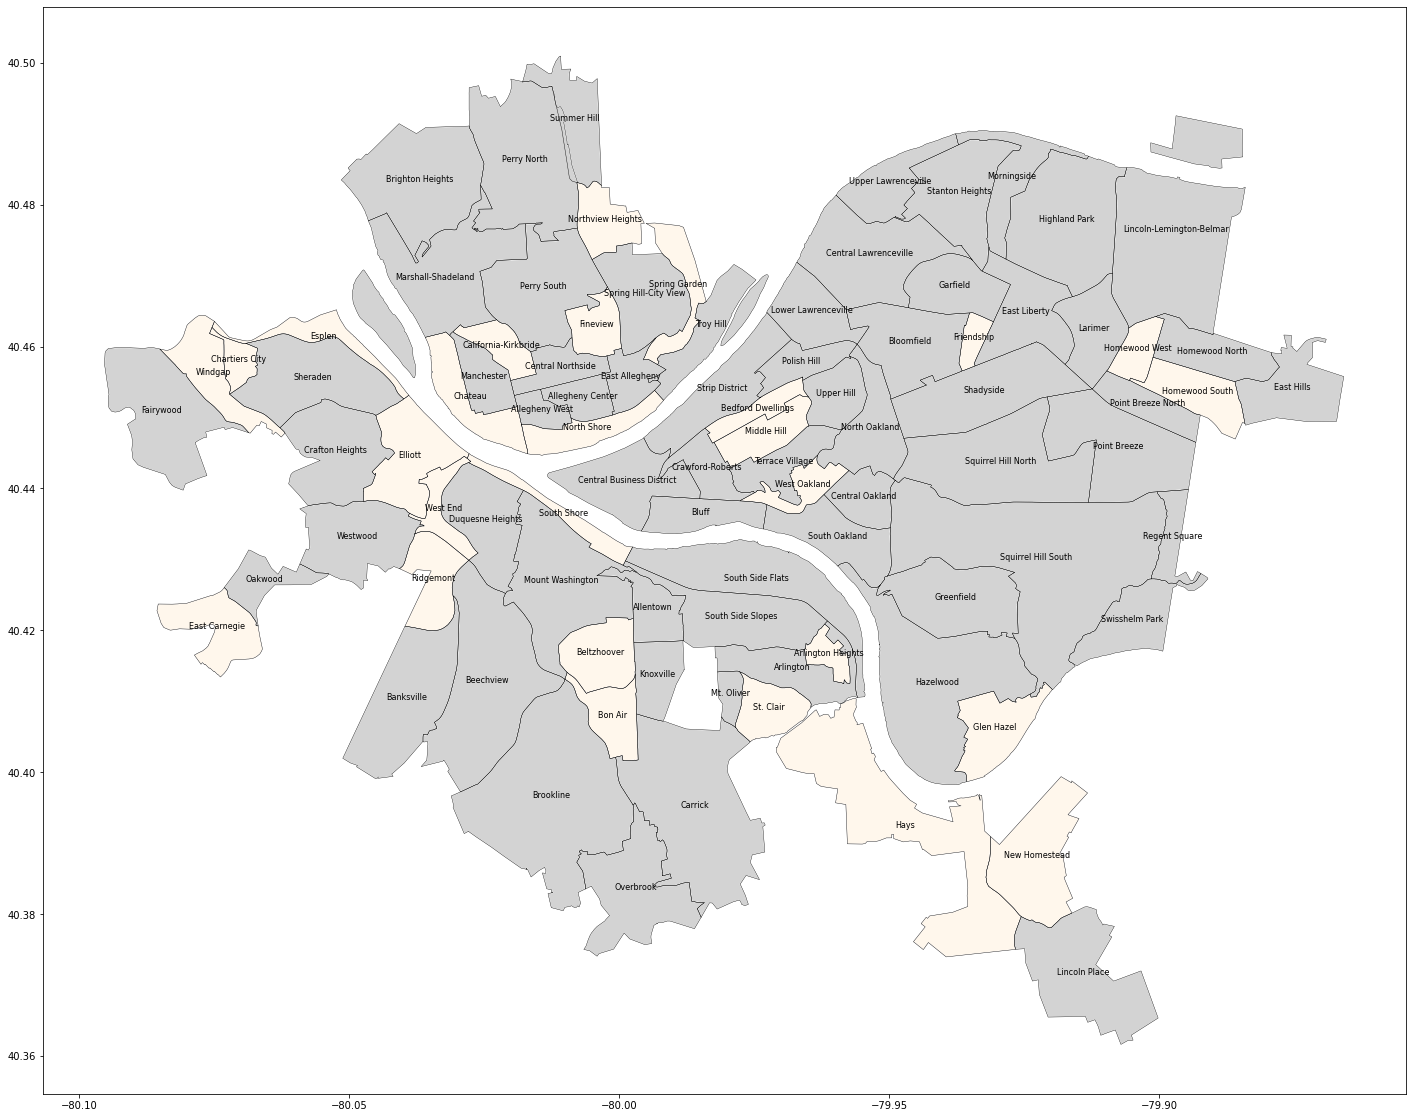

In [26]:
fig = plt.figure(1, figsize=(30,20)) 
ax = fig.add_subplot()
mergedWealth.apply(lambda x: ax.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,),axis=1);
mergedWealth.boundary.plot(ax=ax, color='Black', linewidth=.4)
mergedWealth.plot(ax=ax,column='Percentage', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Population"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

### Water Area

- Before we merge the final dataset with the other two, we need to first we need to read in the neighborhoods csv file as it contains "AWATER10" values for each neighborhood. "AWATER10" stands for the total area of water in meters squared based on the 2010 census. "AWATER10" also is relative to the amount of open bodies of water in a neighborhood.

In [27]:
#read in the dataset
neighborhood = pd.read_csv('https://pghgishub-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.csv?outSR=%7B%22latestWkid%22%3A2272%2C%22wkid%22%3A102729%7D')
neighborhood.head(10)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,temp,Shape__Area,Shape__Length
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,1.068826e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.068796e+07,19600.573085
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,1.223202e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.133208e+07,21174.473326
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,8.739570e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,8.743618e+06,13811.917169
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,1.755059e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.754935e+07,18197.745741
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,2.522062e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,2.522420e+07,26390.549314
5,1298,31,42,003,250900,2,420032509002,Block Group 2,G5030,S,...,6.958774e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,6.962440e+06,12620.549035
6,1299,58,42,003,250300,1,420032503001,Block Group 1,G5030,S,...,7.218352e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,7.219561e+06,14391.314228
7,1300,59,42,003,241200,2,420032412002,Block Group 2,G5030,S,...,7.653279e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,7.656111e+06,21431.626212
8,1301,61,42,003,240600,2,420032406002,Block Group 2,G5030,S,...,1.071729e+07,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,1.283815e+07,29607.526014
9,1302,64,42,003,563200,3,420035632003,Block Group 3,G5030,S,...,6.577920e+06,15,Stephanie Joy Everett,pgh.admin,2020/08/14 14:52:26.925+00,pgh.admin,2020/08/14 14:52:26.925+00,NaN,6.580348e+06,14429.463887


- Next, we need to filter out all of the neighborhoods that have a total water area of 0 meters squared. We will then create a new dataset and filter out every column except for the column that contains the name of the neighborhood along with the total water area column.

In [28]:
# filter out the neighborhoods with a value of 0 for water area
neighborhood = neighborhood[neighborhood.awater10 != 0]

#create a new dataset for all the neighborhoods with an area water value then filter out all columns except for water area and the name of the neighborhood
neighborhood_water_area = neighborhood.filter(items=['hood', 'awater10'])
neighborhood_water_area

,hood,awater10
0,Chateau,473795
12,North Shore,138447
13,Allegheny Center,5234
15,Marshall-Shadeland,854869
18,Hays,20843
22,Lincoln-Lemington-Belmar,237268
40,Strip District,329216
47,Hazelwood,586785
54,Swisshelm Park,163168
57,Bedford Dwellings,4114


This new table shows us that within the city of Pittsburgh, there are 14 neighborhoods that have a water area above 0 meters squared. 

- Next, in order to make the table easier to read we will change the names of some of our columns.

In [29]:
#rename the 'hood' and 'awater10' columns to 'Neightborhood' and 'Water Area (m^2)'
neighborhood_water_area = neighborhood_water_area.rename( columns = {'hood' : 'Neighborhood' , 'awater10' : 'Water Area (m^2)'})
neighborhood_water_area

,Neighborhood,Water Area (m^2)
0,Chateau,473795
12,North Shore,138447
13,Allegheny Center,5234
15,Marshall-Shadeland,854869
18,Hays,20843
22,Lincoln-Lemington-Belmar,237268
40,Strip District,329216
47,Hazelwood,586785
54,Swisshelm Park,163168
57,Bedford Dwellings,4114


- Now, we merge the new water area dataset with the combined household income and population density dataset. Then we sort the values using the water area column and the population density estimate column.

In [30]:
mergedWater = mergedWealth.merge(neighborhood_water_area, how='left', left_on='County', right_on='Neighborhood')
mergedWater_descending=mergedWater.sort_values(by=['Water Area (m^2)','Estimate; Total'], ascending = False)
mergedWater_descending[['County','Percentage','Estimate; Total','Water Area (m^2)']].dropna()

,County,Percentage,Estimate; Total,Water Area (m^2)
62,Chateau,0.0,3.0,473795.0
53,South Shore,0.0,12.0,416134.0
88,Glen Hazel,0.0,716.0,275741.0
82,Esplen,0.0,309.0,225010.0
44,North Shore,0.0,205.0,138447.0
68,Hays,0.0,405.0,20843.0
66,Bedford Dwellings,0.0,1349.0,4114.0


- Now we will plot the map based on the filtered/merged dataset.

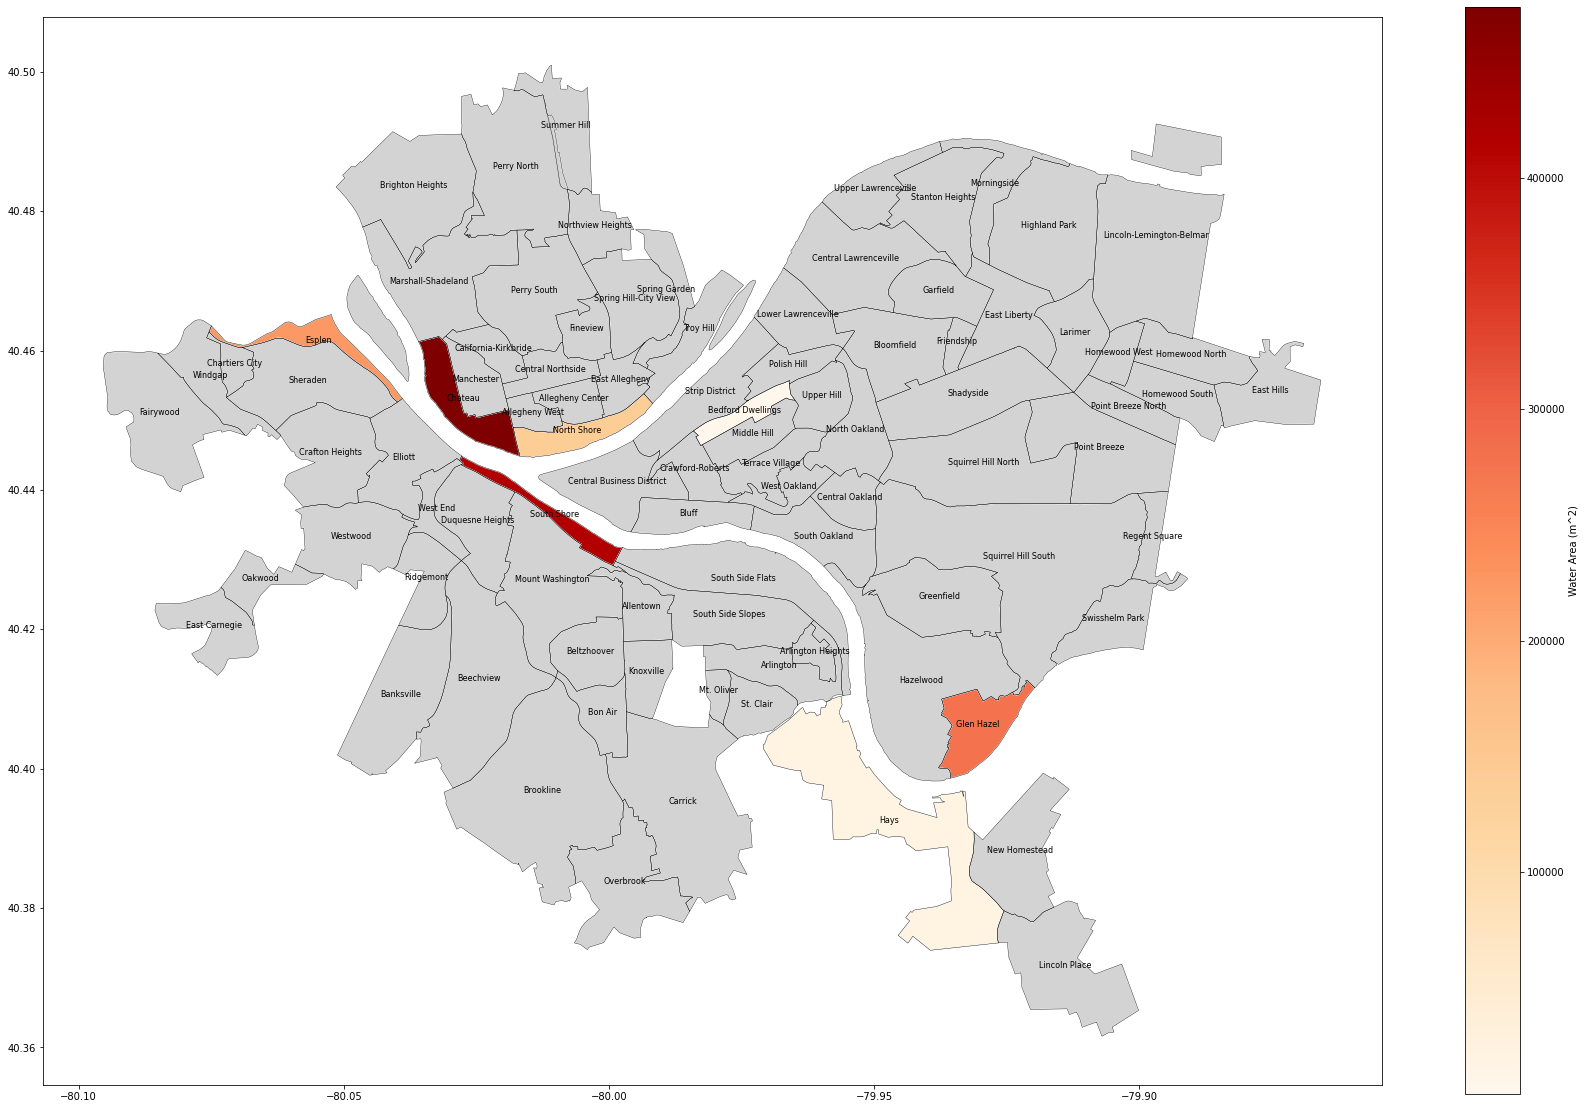

In [32]:
fig = plt.figure(1, figsize=(30,20)) 
ax = fig.add_subplot()
mergedWater.apply(lambda x: ax.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center',fontsize=8,),axis=1);
mergedWater.boundary.plot(ax=ax, color='Black', linewidth=.4)
mergedWater.plot(ax=ax,column='Water Area (m^2)', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Water Area (m^2)"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )

## **Conclusion**

 Based on our results and our metrics Chateau ends up being the neighborhood most suitable to live in if there was a dragon attack on the city of Pittsburgh. However, both Chateau and South Shore are practically industrial zones that are uninhabited, so we ended up deciding that Glen Hazel is the best neighborhood to live in. Unlike Chateau and South Shore, Glen Hazel has a higher population density making it more liveable, while also containing a low wealth distributiong and a large water area.
 
 ### Best neighborhood based on metrics: **CHATEAU**
 
 ### Best neighborhood based on group opinion: **GLEN HAZEL**